In [ ]:
!pip install scikit-plot transformers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
#nltk.download('all')
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, StratifiedKFold, learning_curve, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import scikitplot as skplt

In [ ]:
df = pd.read_excel('finfiz.xlsx')
df.head()

,Unnamed: 0,Ticker,Date,Time,Headline,neg,neu,pos,compound,sentiment
0,0,V,2021-07-22,03:02PM,AXP Option Traders Charged Up for Positive Ear...,0.158,0.526,0.316,0.4215,positive
1,1,V,2021-07-22,12:46PM,10 REIT Dividend Stocks with Over 5% Yields,0.000,1.000,0.000,0.0000,neutral
2,2,V,2021-07-22,07:22AM,Visa snaps up London fintech Currencycloud for...,0.000,1.000,0.000,0.0000,neutral
3,3,V,2021-07-22,05:00AM,Visa to Acquire Currencycloud,0.000,1.000,0.000,0.0000,neutral
4,4,V,2021-07-22,04:06AM,"Texas Instruments, DR Horton Fall Premarket; A...",0.000,1.000,0.000,0.0000,neutral


In [ ]:
for headline in df['Headline']:
    df['Headline'] = df['Headline'].replace("[^a-zA-Z]"," ")
 


In [ ]:
clean_headline_1 = []
def to_lower_text(data):
  for word in df['Headline']:
    clean_headline_1.append(str.lower(word))

In [ ]:
to_lower_text(df['Headline'])

In [ ]:
clean_text_2 = []

from nltk.tokenize import sent_tokenize, word_tokenize

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
sent_tok= []
for sent in clean_headline_1 :
  sent = sent_tokenize(sent)
  sent_tok.append(sent)

In [ ]:
clean_headline_2 = [word_tokenize(i) for i  in clean_headline_1]

In [ ]:
import re 

clean_headline_3=[]

for word in clean_headline_2 :
  clean = []
  for w in word :
    res = re.sub(r'[^\w\s]',"",w)
    if res !="":
      clean.append(res)
  clean_headline_3.append(clean)

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
port = PorterStemmer()

In [ ]:
clean_headline_4 = []
for words in clean_headline_3 :
  w = []
  for word in words :
    word = port.stem(word)
    w.append(word)
  clean_headline_4.append(w)

In [ ]:

for i in range (len(clean_headline_4)) :
    clean_headline_4[i] = " ".join(clean_headline_4[i])
    

In [ ]:
df['Headline'] = clean_headline_4

In [ ]:
df['Headline']

0               axp option trader charg up for posit earn
1                10 reit dividend stock with over 5 yield
2       visa snap up london fintech currencycloud for ...
3                            visa to acquir currencycloud
4       texa instrument dr horton fall premarket at t ...
                              ...                        
3995    torontodominion td stock down 51 despit q1 ear...
3996    what is a dividend plu the 5 best dividend sto...
3997        td bank group td q4 2020 earn call transcript
3998           the torontodominion bank to host earn call
3999           td asset manag inc announc risk rate chang
Name: Headline, Length: 4000, dtype: object

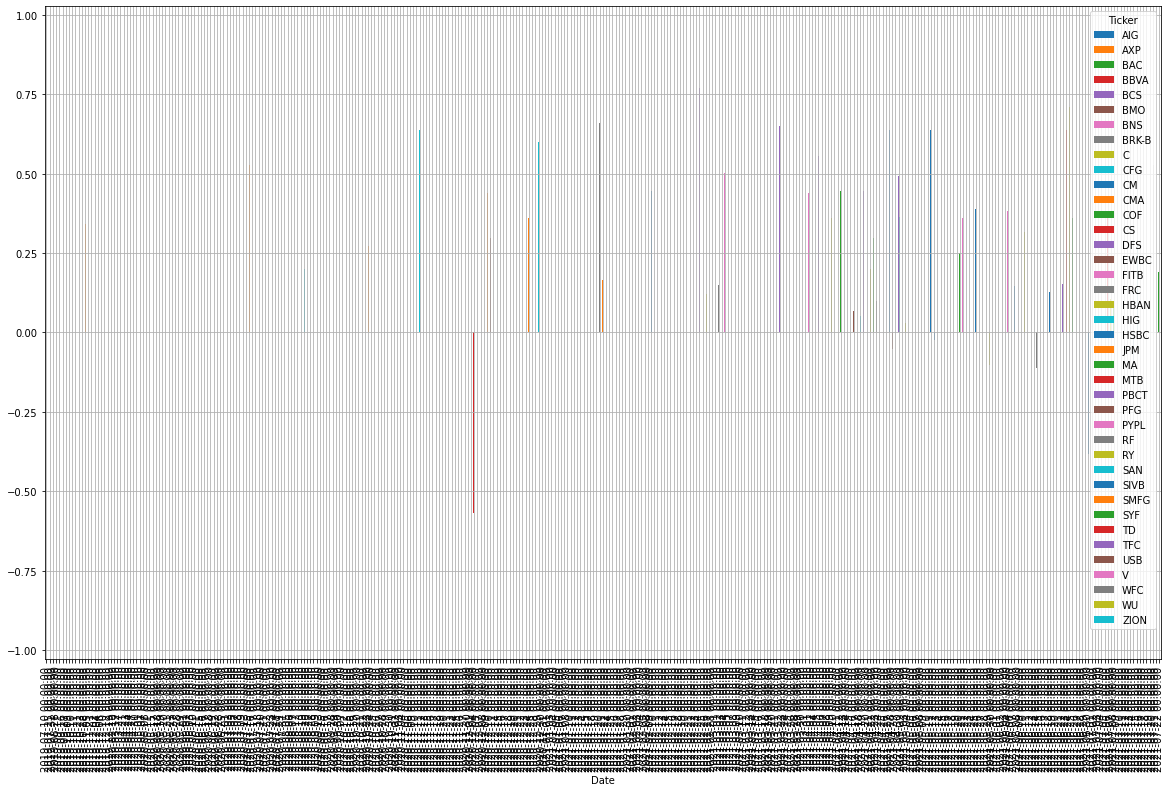

In [ ]:
plt.rcParams['figure.figsize'] = [20, 12]
mean_scores = df.groupby(['Ticker','Date']).mean()
mean_scores = mean_scores.unstack()
mean_scores = mean_scores.xs('compound', axis="columns").transpose()
mean_scores.plot(kind = 'bar')
plt.grid()

In [ ]:
df.drop(columns=['Ticker','Date','Time','pos','neu','neg','compound'])

,Unnamed: 0,Headline,sentiment
0,0,axp option trader charg up for posit earn,positive
1,1,10 reit dividend stock with over 5 yield,neutral
2,2,visa snap up london fintech currencycloud for ...,neutral
3,3,visa to acquir currencycloud,neutral
4,4,texa instrument dr horton fall premarket at t ...,neutral
...,...,...,...
3995,3995,torontodominion td stock down 51 despit q1 ear...,neutral
3996,3996,what is a dividend plu the 5 best dividend sto...,positive
3997,3997,td bank group td q4 2020 earn call transcript,neutral
3998,3998,the torontodominion bank to host earn call,neutral


Text(0.5, 1.0, 'The number of words per data')

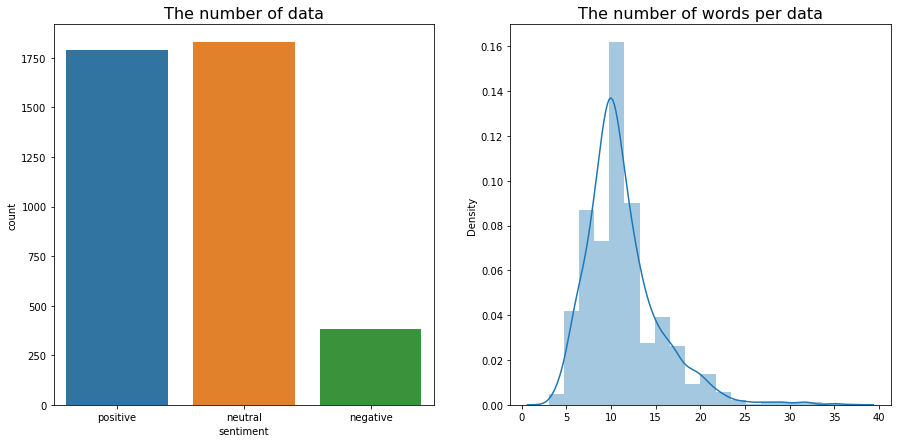

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

sns.countplot(x='sentiment', data=df, ax=ax1)
ax1.set_title('The number of data', fontsize=16)
sns.distplot([len(nltk.word_tokenize(words)) for words in df['Headline']], bins=20, ax=ax2)
ax2.set_title('The number of words per data', fontsize=16)

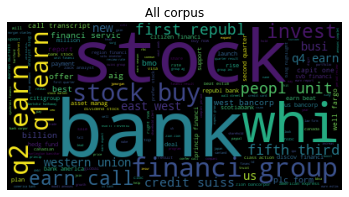

<Figure size 432x288 with 0 Axes>

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def plot_word_cloud(df,Headline='Headline',label=None,save=True):
  """ Inputs : Dataset, text colums,labels column
  Output : Word cloud for all the corpus and for each label"""
  word_cloud_data = " ".join([post for post in df[Headline] ])
  word_cloud_data = WordCloud(stopwords=STOPWORDS).generate(word_cloud_data)
  plt.figure()
  plt.imshow(word_cloud_data)
  plt.title('All corpus')
  plt.axis("off")
  plt.show()
  if save:
    plt.savefig('wordcloud.png', dpi=300)
  if label !=None:
    labels=df[label].unique()
    for i in range(len(labels)):
          word_cloud_data = " ".join([post for (post,label) in zip(df[Headline],df[label]) if label==labels[i]])
          word_cloud_data = WordCloud(stopwords=STOPWORDS).generate(word_cloud_data)
          plt.figure(i)
          plt.imshow(word_cloud_data)
          plt.title('{}'.format(labels[i]))
          plt.axis("off")
plot_word_cloud(df,Headline='Headline')



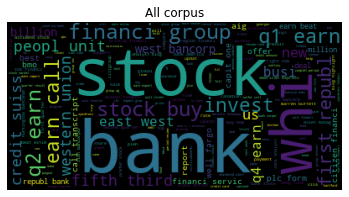

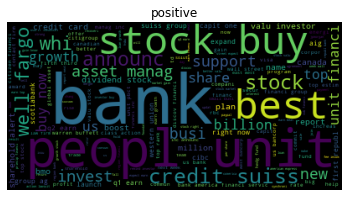

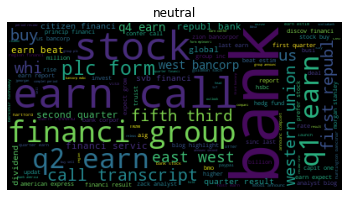

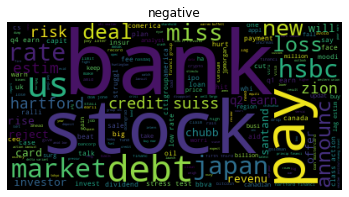

In [ ]:
plot_word_cloud(df,'Headline','sentiment',False)

# **Count Vectorizer + Random Forest**

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df['Headline'],df['sentiment'], test_size=0.2, random_state=25)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(X_train)

In [ ]:
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
test_dataset = countvector.transform(X_test)
predictions = randomclassifier.predict(test_dataset)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
matrix = confusion_matrix(y_test,predictions)
print(matrix)
score = accuracy_score(y_test,predictions)
print(score)
report=classification_report(y_test,predictions)
print(report)

[[ 26  55   7]
 [  0 361   6]
 [  2 123 220]]
0.75875
              precision    recall  f1-score   support

    negative       0.93      0.30      0.45        88
     neutral       0.67      0.98      0.80       367
    positive       0.94      0.64      0.76       345

    accuracy                           0.76       800
   macro avg       0.85      0.64      0.67       800
weighted avg       0.82      0.76      0.74       800



# *Logistic regression*

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['Headline'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['sentiment'], random_state=42, test_size=0.25)

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix
pred = model.predict(x_test)
accuracy_score(y_test,pred)

0.857

In [ ]:
confusion_matrix(y_test,pred)

array([[ 49,  32,  12],
       [ 10, 424,  31],
       [  8,  50, 384]])

In [ ]:
report=classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

    negative       0.73      0.53      0.61        93
     neutral       0.84      0.91      0.87       465
    positive       0.90      0.87      0.88       442

    accuracy                           0.86      1000
   macro avg       0.82      0.77      0.79      1000
weighted avg       0.86      0.86      0.85      1000



# **TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
tfidfvector=TfidfVectorizer(ngram_range=(2,2))
traindataset=tfidfvector.fit_transform(X_train)

In [ ]:
randomclassifier  = RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
test_dataset = tfidfvector.transform(X_test)
predictions = randomclassifier.predict(test_dataset)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
matrix = confusion_matrix(y_test,predictions)
print(matrix)
score = accuracy_score(y_test,predictions)
print(score)
report=classification_report(y_test,predictions)
print(report)

[[ 25  54   9]
 [  0 350  17]
 [  2 117 226]]
0.75125
              precision    recall  f1-score   support

    negative       0.93      0.28      0.43        88
     neutral       0.67      0.95      0.79       367
    positive       0.90      0.66      0.76       345

    accuracy                           0.75       800
   macro avg       0.83      0.63      0.66       800
weighted avg       0.80      0.75      0.74       800



# **MultinomialNB**

In [ ]:
from  sklearn.naive_bayes import MultinomialNB

In [ ]:
naive = MultinomialNB()
naive.fit(traindataset,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
test_dataset = tfidfvector.transform(X_test)
predictions = naive.predict(test_dataset)

In [ ]:
matrix = confusion_matrix(y_test,predictions)
print(matrix)
score = accuracy_score(y_test,predictions)
print(score)
report=classification_report(y_test,predictions)
print(report)

[[  0  55  33]
 [  0 320  47]
 [  0  63 282]]
0.7525
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        88
     neutral       0.73      0.87      0.80       367
    positive       0.78      0.82      0.80       345

    accuracy                           0.75       800
   macro avg       0.50      0.56      0.53       800
weighted avg       0.67      0.75      0.71       800

